In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Carga el conjunto de datos con el tipo de datos especificado
# multiple_choice_responses = pd.read_csv("Dataset/kaggle-survey-2019/multiple_choice_responses.csv", dtype=dtype_dict)
multiple_choice_responses = pd.read_csv("Dataset/kaggle-survey-2019/multiple_choice_responses.csv", low_memory=False)
other_text_responses = pd.read_csv("Dataset/kaggle-survey-2019/other_text_responses.csv")
questions_only = pd.read_csv("Dataset/kaggle-survey-2019/questions_only.csv")
survey_schema = pd.read_csv("Dataset/kaggle-survey-2019/survey_schema.csv")

# Muestra las columnas de todas las tablas
print("1. multiple_choice_response: ", multiple_choice_responses.columns)
print("2. other_text_responses: ", other_text_responses.columns)
print("3. questions_only: ", questions_only.columns)
# print("4. survey_schema: ", survey_schema)


1. multiple_choice_response:  Index(['Time from Start to Finish (seconds)', 'Q1', 'Q2', 'Q2_OTHER_TEXT',
       'Q3', 'Q4', 'Q5', 'Q5_OTHER_TEXT', 'Q6', 'Q7',
       ...
       'Q34_Part_4', 'Q34_Part_5', 'Q34_Part_6', 'Q34_Part_7', 'Q34_Part_8',
       'Q34_Part_9', 'Q34_Part_10', 'Q34_Part_11', 'Q34_Part_12',
       'Q34_OTHER_TEXT'],
      dtype='object', length=246)
2. other_text_responses:  Index(['Q12_OTHER_TEXT', 'Q13_OTHER_TEXT', 'Q14_OTHER_TEXT', 'Q14_Part_1_TEXT',
       'Q14_Part_2_TEXT', 'Q14_Part_3_TEXT', 'Q14_Part_4_TEXT',
       'Q14_Part_5_TEXT', 'Q16_OTHER_TEXT', 'Q17_OTHER_TEXT', 'Q18_OTHER_TEXT',
       'Q19_OTHER_TEXT', 'Q20_OTHER_TEXT', 'Q21_OTHER_TEXT', 'Q24_OTHER_TEXT',
       'Q25_OTHER_TEXT', 'Q26_OTHER_TEXT', 'Q27_OTHER_TEXT', 'Q28_OTHER_TEXT',
       'Q29_OTHER_TEXT', 'Q2_OTHER_TEXT', 'Q30_OTHER_TEXT', 'Q31_OTHER_TEXT',
       'Q32_OTHER_TEXT', 'Q33_OTHER_TEXT', 'Q34_OTHER_TEXT', 'Q5_OTHER_TEXT',
       'Q9_OTHER_TEXT'],
      dtype='object')
3. questions_onl

In [4]:
multiple_choice_responses['Q3'].replace('United Kingdom of Great Britain and Northern Ireland', 'United Kingdom',
                                       inplace = True)

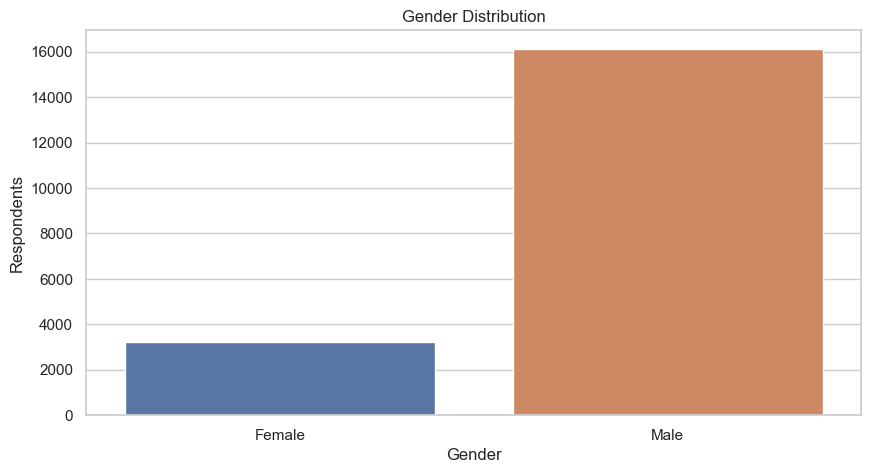

In [10]:
# Seleccionar la columna Q2 y asignar un nombre de columna adecuado
genders = multiple_choice_responses[['Q2']].drop(multiple_choice_responses.index[0])
genders.columns = ['Gender']

# Filtrar solo Female y Male, y luego agrupar y contar la cantidad de cada uno
gender_distr = genders[(genders['Gender'] == 'Female') | (genders['Gender'] == 'Male')].groupby('Gender').size().reset_index(name='Respondents')

# Crear el gráfico de barras
fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.set_title('Gender Distribution')
ax.set(xlabel='Gender', ylabel='Respondents')
sns.set(style='whitegrid')
ax = sns.barplot(x='Gender', y='Respondents', data=gender_distr, ax=ax)
plt.show()

In [11]:
demographics = multiple_choice_responses[['Q1','Q2','Q3']].drop(multiple_choice_responses.index[0])
demographics = demographics[(demographics['Q2'] == 'Female') | (demographics['Q2'] == 'Male')]
demographics = demographics.rename(columns={'Q1':'Age_Group', 'Q2':'Gender', 'Q3':'Country'})

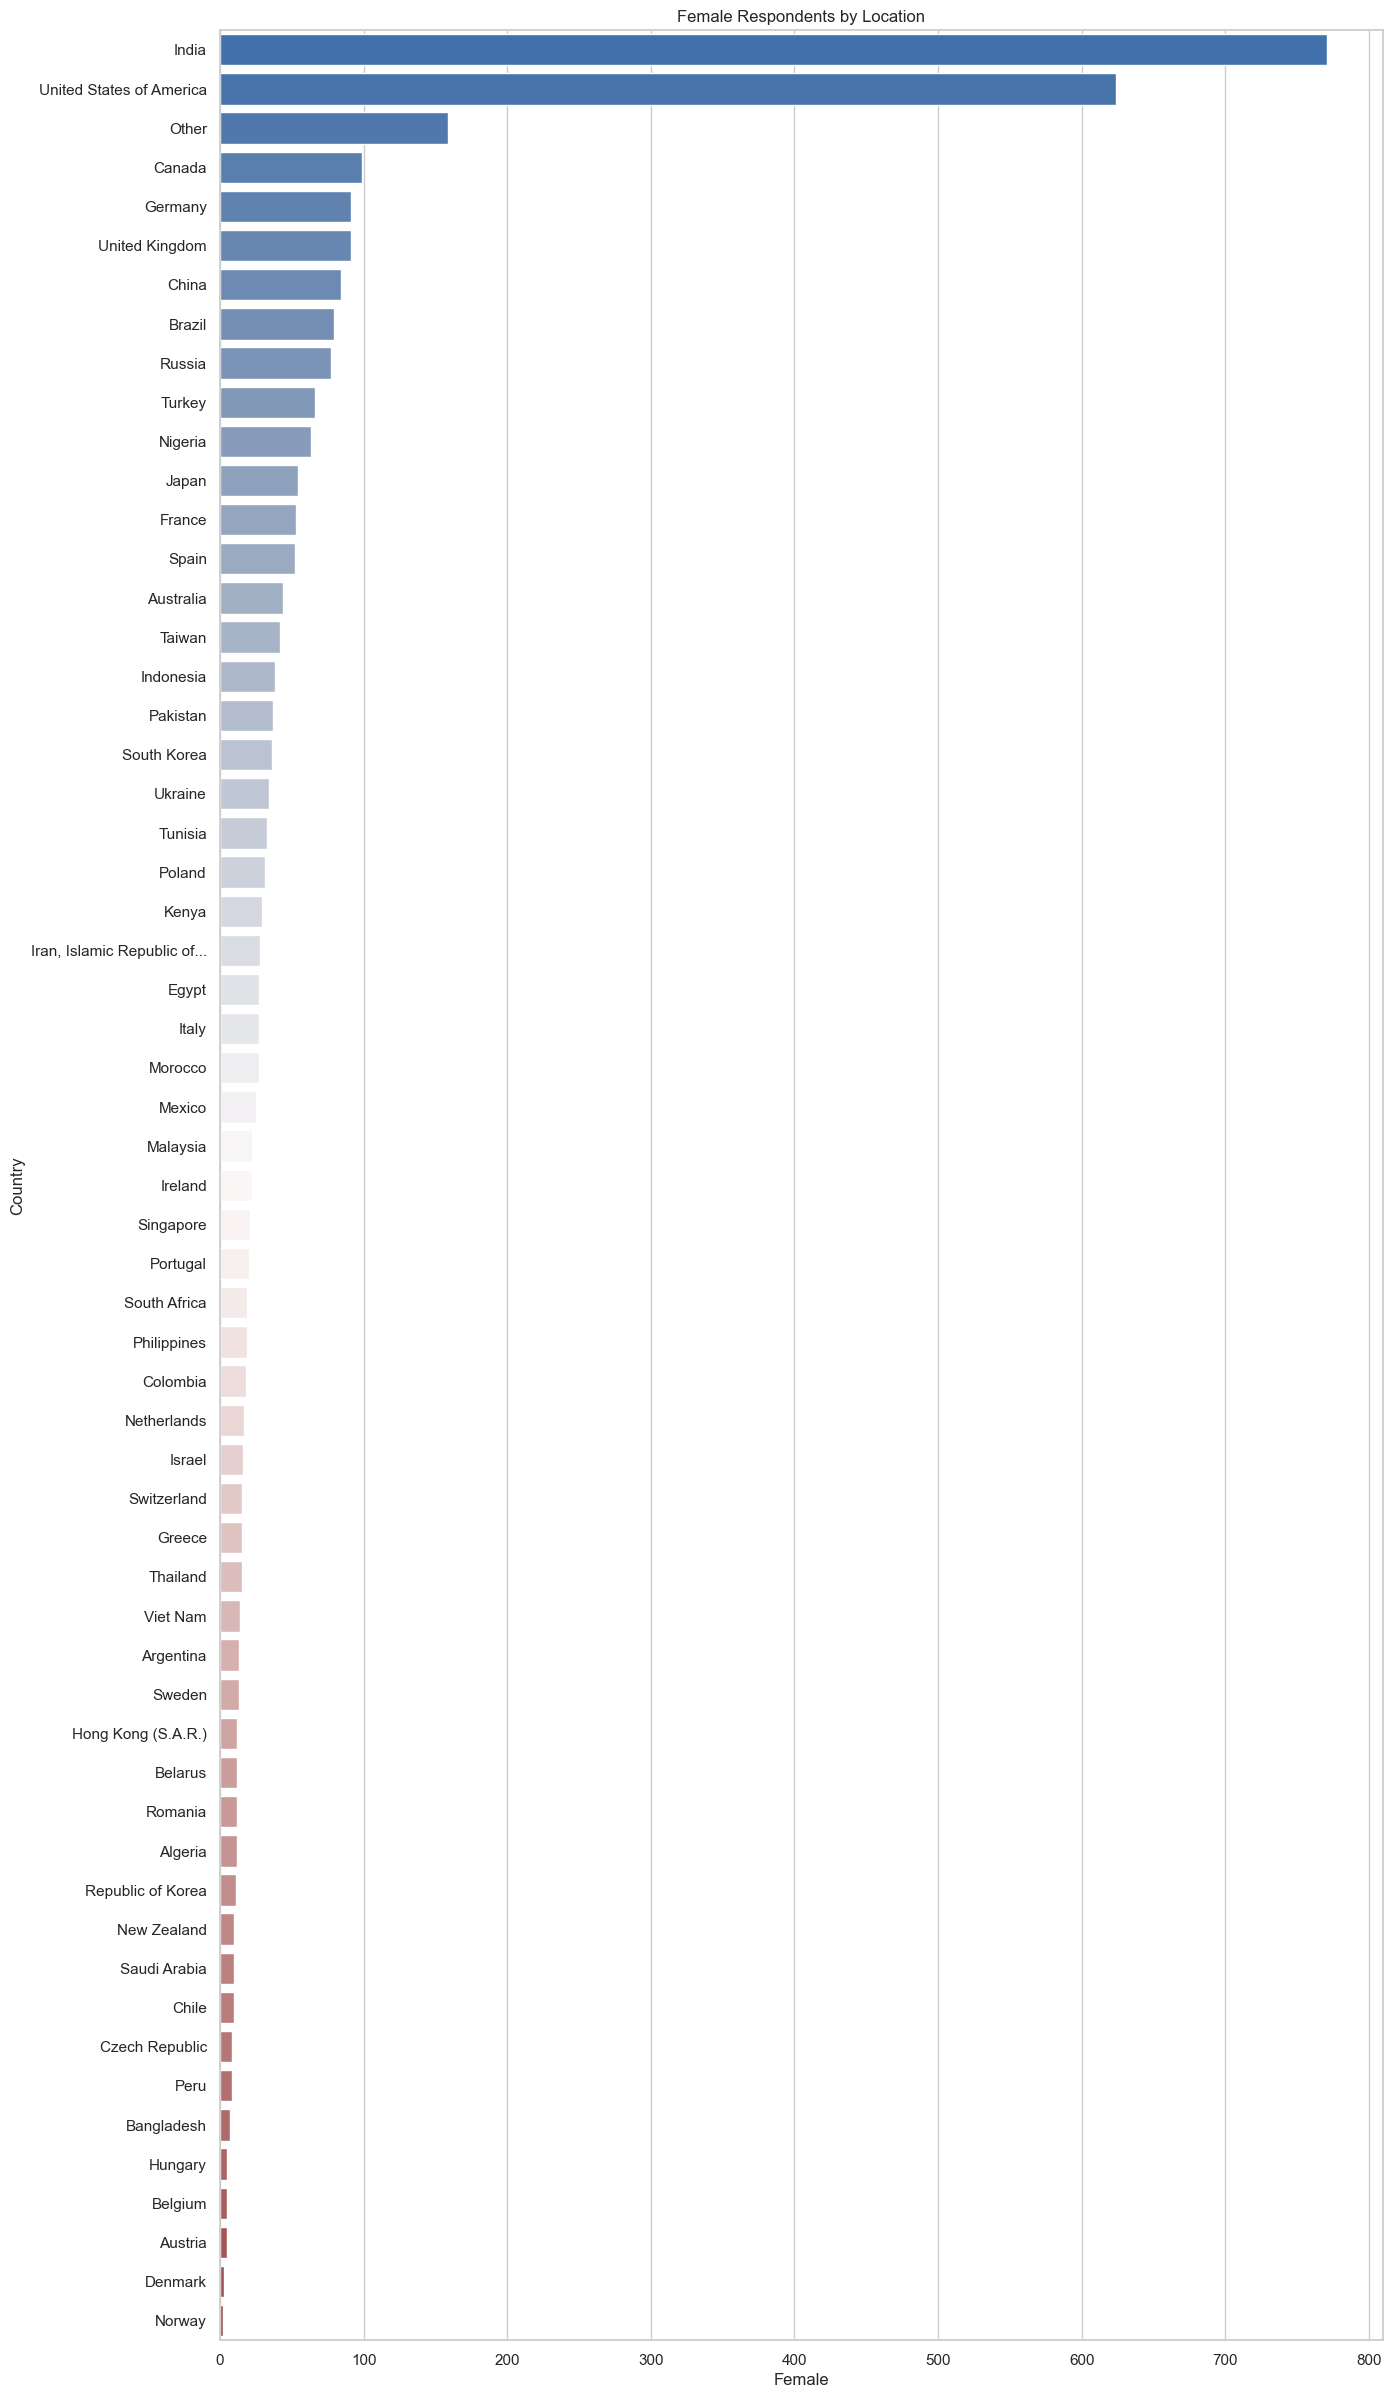

In [14]:
loc = pd.crosstab(demographics['Country'], demographics['Gender'])

# Convirtiendo las columnas 'Female' y 'Male' a tipo float
loc['Female'] = loc['Female'].astype(float)
loc['Male'] = loc['Male'].astype(float)

# Ordenando los valores por el número de mujeres (en orden descendente)
loc = loc.sort_values(by=['Female'], ascending=False)

# Creando el gráfico de barras horizontal
fig, ax = plt.subplots(1, 1, figsize=(15, 30))
ax.set_title('Female Respondents by Location')
ax.set(xlabel='Counts')
sns.set(style='whitegrid')
ax = sns.barplot(x=loc['Female'], y=loc.index, ax=ax, palette="vlag")
plt.show()

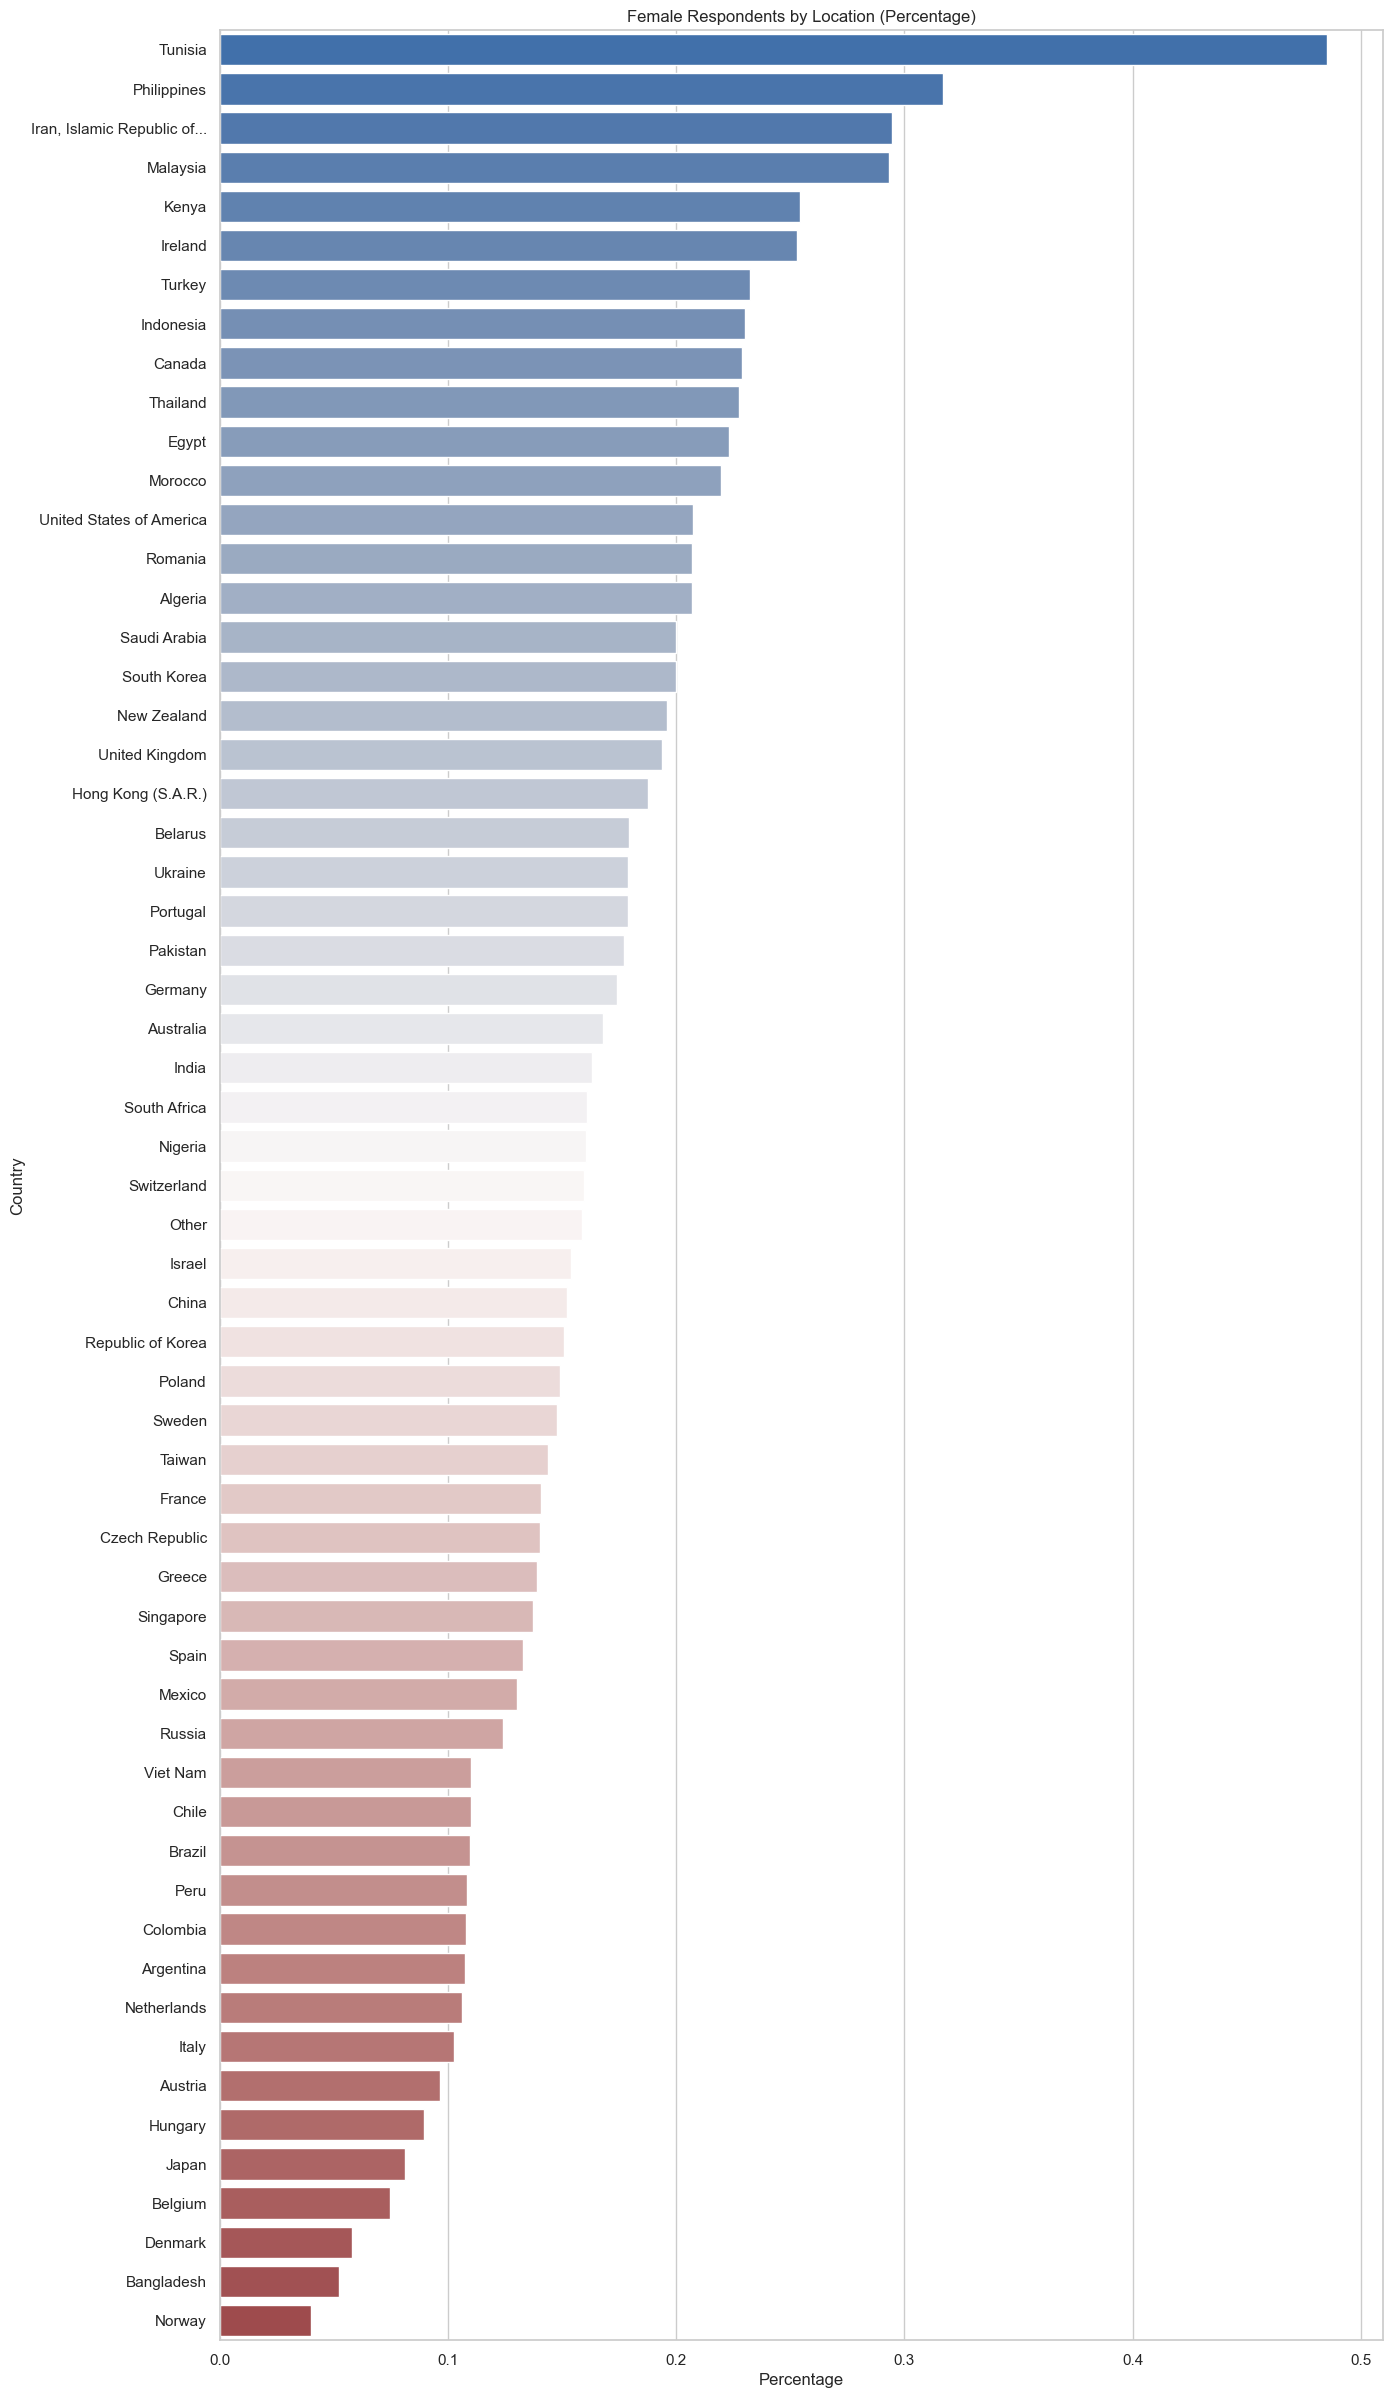

In [15]:
# Calculando el porcentaje de mujeres por ubicación
for i in loc.index:
    female = loc.at[i, 'Female']
    male = loc.at[i, 'Male']
    total = loc.at[i, 'Female'] + loc.at[i, 'Male']
    loc.at[i, 'Female'] = round(female / total, 4)  # Calculando el porcentaje y redondeando a 4 decimales

# Eliminando la columna 'Male'
loc = loc.drop(['Male'], axis=1)

# Ordenando los valores por el porcentaje de mujeres (en orden descendente)
loc = loc.sort_values(by=['Female'], ascending=False)

# Creando el gráfico de barras horizontal para el porcentaje de mujeres
fig, ax = plt.subplots(1, 1, figsize=(15, 30))
ax.set_title('Female Respondents by Location (Percentage)')
ax.set(xlabel='Percentage')
sns.set(style='whitegrid')
ax = sns.barplot(x=list(loc['Female']), y=loc.index, ax=ax, palette="vlag")
plt.show()

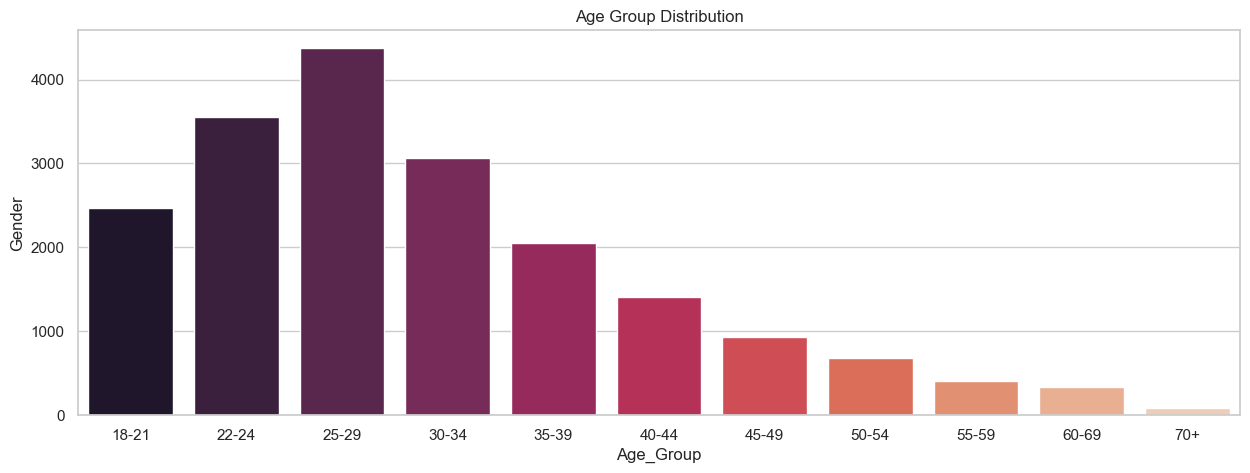

In [19]:
age = pd.crosstab(demographics['Age_Group'], demographics['Gender'])
age['Female'] = age['Female'].astype(float)
age['Male'] = age['Male'].astype(float)

totals = demographics.groupby('Age_Group').agg({'Gender':'count'})

fig, ax = plt.subplots(1,1,figsize=(15,5))
ax.set_title('Age Group Distribution')
ax.set(xlabel='Age Group', ylabel='Respondents')
sns.set(style='whitegrid')
sns.barplot(x=totals.index, y=totals['Gender'], palette="rocket", ax=ax)
plt.show()



In [20]:
for i in age.index:
    female = age.at[i, 'Female']
    male = age.at[i, 'Male']
    total = age.at[i, 'Female'] + age.at[i, 'Male']
    age.at[i, 'Female'] = round(female / total,4)

age = age.drop(['Male'], axis=1)

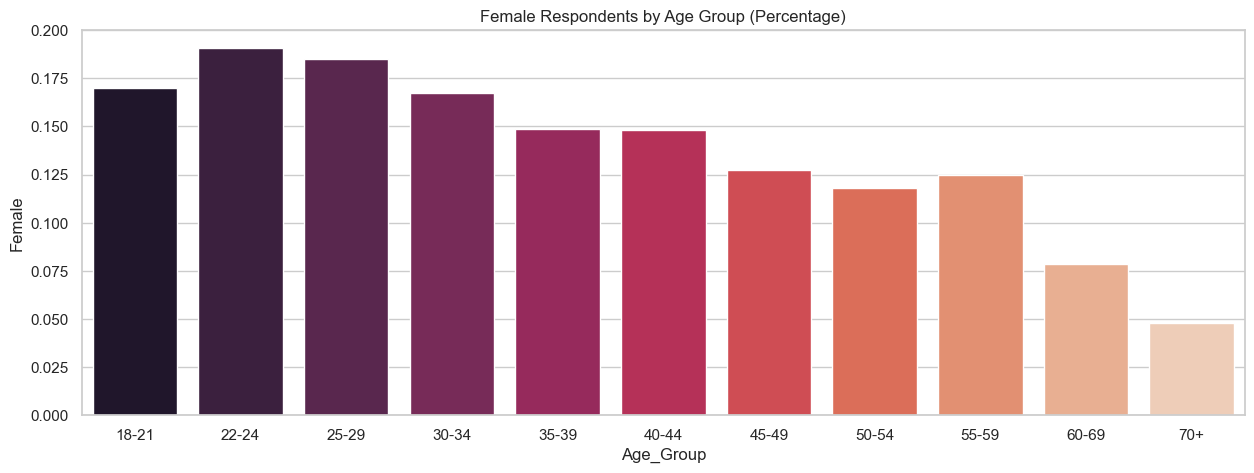

In [23]:
fig, ax = plt.subplots(1,1,figsize=(15,5))

ax.set_title('Female Respondents by Age Group (Percentage)')
ax.set(ylabel='Percentage')
sns.set(style='whitegrid')

ax = sns.barplot(x=age.index, y=age['Female'], palette="rocket")


plt.show()